# Embeddable Slider for CV function visualisation

Everything (?) you need to know to get an embeddable interactive widget with buttons, sliderds and whatnot working inside an ipython notebook in three simple steps.

## First step: Let's see ipython widgets at work

The library for what we want to do is `ipython widgets`. We'll start by taking a look at a ready-made example from [this post](https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/), starting by the last example. First, we create the functions we want to plot and embed:

In [4]:
%matplotlib inline
from sklearn.neighbors import KernelDensity
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.concatenate([np.random.normal(0, 1, 1000),
                    np.random.normal(1.5, 0.2, 300)])

def plot_KDE_estimate(kernel, b):
    bandwidth = 10 ** (0.1 * b)
    x_grid = np.linspace(-3, 3, 1000)
    kde = KernelDensity(bandwidth=bandwidth,
                        kernel=kernel)
    kde.fit(x[:, None])
    pdf = np.exp(kde.score_samples(x_grid[:, None]))
    
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.hist(x, 60, histtype='stepfilled', normed=True,
            edgecolor='none', facecolor='#CCCCFF')
    ax.plot(x_grid, pdf, '-k', lw=2, alpha=0.5)
    ax.text(-2.8, 0.48,
            "kernel={0}\nbandwidth={1:.2f}".format(kernel, bandwidth),
            fontsize=14, color='gray')
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 0.601)
    
#    return fig <- removed to avoid double plot

Now some `ipywidgets` magic:

In [5]:
from ipywidgets import StaticInteract, RangeWidget
StaticInteract(plot_KDE_estimate,
               kernel=RadioWidget(['gaussian', 'tophat', 'exponential'],
                                  delimiter="<br>"),
               b=RangeWidget(-14, 8, 2))

ImportError: cannot import name 'StaticInteract'

[disappointed.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6by0Ff3e3ceMmWHw-MwpDv6Ip8oJt0nGGFUq0l6J_LsSakzpExA)

## 1.5st step: for real this time

Let's try this again, now updating the above with additional, updated information from [the documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

<function __main__.plot_KDE_estimate>

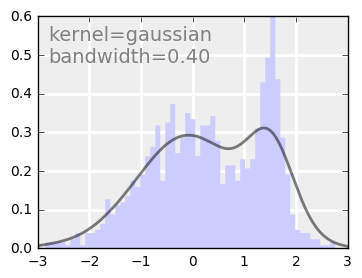

In [6]:
from ipywidgets import interact
interact(plot_KDE_estimate,
         kernel=('gaussian', 'tophat', 'exponential'),
         b=(-14, 8, 2))

[yay.png](http://images.digopaul.com/wp-content/uploads/related_images/2015/09/08/ecstatic_2.jpg)

Now that we've got this working, let's build some stuff from scratch to play around with the library.

## Second step: Building some stuff from scratch

Just to make sure we got the hang of it, let's build some stuff from scratch, shall we?

### Slider

How about changing the size of the image?

<function __main__.set_img_size>

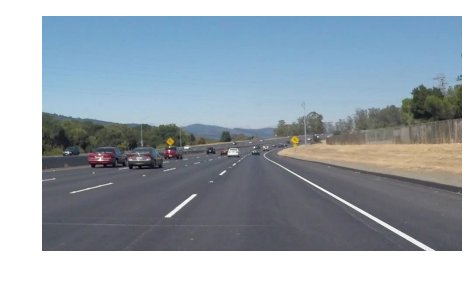

In [7]:
from matplotlib import image as mpimg

original = mpimg.imread("sample.jpg")

def set_img_size(scale):
    global original
    fig = plt.figure(figsize = (scale * 5.4, scale * 9.6))
    ax = fig.add_subplot(111)
    ax.imshow(original)
    ax.axis("off")

interact(set_img_size,
         scale = (0.1,2.,0.1))

### Tickbox

Next, let's try adding a tickbox to control colour/greyscale switching.

In [92]:
import cv2

grey = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

def set_colour_scheme(is_grey):
    global original
    global grey

    fig = plt.figure()
    ax = fig.add_subplot(111)
    if is_grey:
        ax.imshow(grey, cmap="gray")
    else:
        ax.imshow(original)
    ax.axis("off")

interact(set_colour_scheme,
         is_grey = False)

<function __main__.set_colour_scheme>

### Dropdown

Let's try having a dropdown menu with a bunch of different colourmaps to pick from.

<function __main__.colourmap_picker>

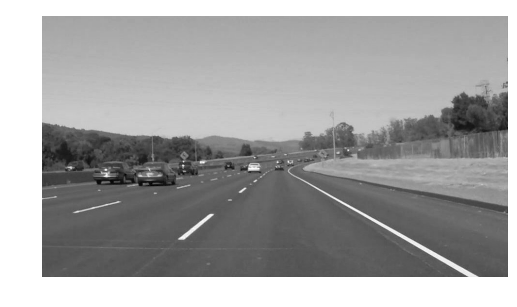

In [9]:
def colourmap_picker(cmap):
    global grey
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(grey, cmap = cmap)
    ax.axis("off")

interact(colourmap_picker,
         cmap = ("gray", "Greys", "gist_heat", "bone", # sequential
                 "magma", "viridis", # perceptually uniform
                 "seismic", "PRGn", "BrBG_r", # diverging
                 "Set3", "Accent_r", "Pastel1", # qualitative
                 "jet", "terrain_r", "prism")) # misc

### Dependencies

What if we want one interactive button to be dependent on another? Let's try to group the colourmaps by family.

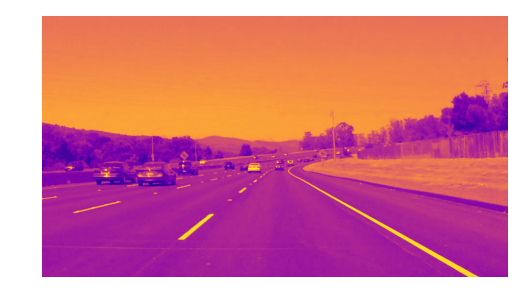

In [76]:
from ipywidgets import Dropdown, ToggleButton

def fancy_colourmap_picker(family, cmap, invert):
    global grey
    if invert:
        cmap += '_r'
    plt.close("all")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(grey, cmap = cmap)
    ax.axis("off")

cmaps = {'Perceptually Uniform Sequential':
                            ('viridis', 'inferno', 'plasma', 'magma'),
         'Sequential':      ('Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'),
         'Sequential (2)':  ('afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter'),
         'Diverging':       ('BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic'),
         'Qualitative':     ('Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3'),
         'Miscellaneous':   ('gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism')}

families = tuple(cmaps.keys())
colours = ()
for c in cmaps.values():
    colours += c

fam_widget = Dropdown(options = families, description="Family")
map_widget = Dropdown(options = colours, description="Colormap")
rev_widget = ToggleButton(value=False, description="Reverse")

def update_maps(*args):
    map_widget.options = cmaps[fam_widget.value]
fam_widget.observe(update_maps, 'value')

interact(fancy_colourmap_picker, 
         family = fam_widget,
         cmap = map_widget,
         invert = rev_widget)

### Opening and Closing Widgets

Lastly, let's see if we can get widgets to display and hide each other, to avoid having 9000 sliders in the screen simultaneously.

In [151]:
from IPython.display import Image, display, clear_output
from ipywidgets import ToggleButton, interactive

def fancier_colourmap_picker(cmap, inv):
    global grey
    plt.close("all")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if inv:
        cmap += '_r'
    ax.imshow(grey, cmap = cmap)
    ax.axis("off")

def redraw_caller(Uni, Seq, Sq2, Dvr, Qlt, Msc):
    redraw_options (Uni * "Perceptually Uniform Sequential" or
                    Seq * "Sequential" or
                    Sq2 * "Sequential (2)" or
                    Dvr * "Diverging" or
                    Qlt * "Qualitative" or
                    Msc * "Miscellaneous" or
                    "Sequential") # if something goes wrong

invert_button = ToggleButton(description="invert", value=False)
    
def redraw_options(fam):
    global menu
    global invert_button
    
    menu.close()
    dropdown = Dropdown(options = cmaps[fam], description="Colormap")

    menu = interactive(fancier_colourmap_picker,
                       cmap = dropdown,
                       inv = invert_button)
    display(menu)


wuni = ToggleButton(description = "Uniform", value = True)
wseq = ToggleButton(description = "Sequential", value = False)
wsq2 = ToggleButton(description = "Sequential (2)", value = False)
wdvr = ToggleButton(description = "Diverging", value = False)
wqlt = ToggleButton(description = "Qualitative", value = False)
wmsc = ToggleButton(description = "Miscelaneous", value = False)

def update_buttons(*args):
    '''
    This is an ugly function. Sorry.
    Didn't originally mean to have so many buttons. 
    '''
    if wuni.value == True and wuni.disabled == False:
        wuni.disabled = True
        wseq.value, wseq.disabled = False, False
        wsq2.value, wsq2.disabled = False, False
        wdvr.value, wdvr.disabled = False, False
        wqlt.value, wqlt.disabled = False, False
        wmsc.value, wmsc.disabled = False, False
    elif wseq.value == True and wseq.disabled == False:
        wseq.disabled = True
        wuni.value, wuni.disabled = False, False
        wsq2.value, wsq2.disabled = False, False
        wdvr.value, wdvr.disabled = False, False
        wqlt.value, wqlt.disabled = False, False
        wmsc.value, wmsc.disabled = False, False
    elif wsq2.value == True and wsq2.disabled == False:
        wsq2.disabled = True
        wuni.value, wuni.disabled = False, False
        wseq.value, wseq.disabled = False, False
        wdvr.value, wdvr.disabled = False, False
        wqlt.value, wqlt.disabled = False, False
        wmsc.value, wmsc.disabled = False, False
    elif wdvr.value == True and wdvr.disabled == False:
        wdvr.disabled = True
        wuni.value, wuni.disabled = False, False
        wseq.value, wseq.disabled = False, False
        wsq2.value, wsq2.disabled = False, False
        wqlt.value, wqlt.disabled = False, False
        wmsc.value, wmsc.disabled = False, False
    elif wqlt.value == True and wqlt.disabled == False:
        wqlt.disabled = True
        wuni.value, wuni.disabled = False, False
        wseq.value, wseq.disabled = False, False
        wsq2.value, wsq2.disabled = False, False
        wdvr.value, wdvr.disabled = False, False
        wmsc.value, wmsc.disabled = False, False
    elif wmsc.value == True and wmsc.disabled == False:
        wmsc.disabled = True
        wuni.value, wuni.disabled = False, False
        wseq.value, wseq.disabled = False, False
        wsq2.value, wsq2.disabled = False, False
        wdvr.value, wdvr.disabled = False, False
        wqlt.value, wqlt.disabled = False, False


wuni.observe(update_buttons)
wseq.observe(update_buttons)
wsq2.observe(update_buttons)
wdvr.observe(update_buttons)
wqlt.observe(update_buttons)
wmsc.observe(update_buttons)

interact(redraw_caller,
         Uni = wuni,
         Seq = wseq,
         Sq2 = wsq2,
         Dvr = wdvr,
         Qlt = wqlt,
         Msc = wmsc)

I think we got the hang of it, right? Shall we get to the interesting stuff, now?

## Third Step: Getting to the interesting stuff, now

At last, we add the computer vision stuff. I'll build an interactive widget to hand-tune each step of the P0 pipeline using sliders, instead of guessing. Let's see how that goes, first I'll bring in all the functions from P0:

In [99]:
import math

def grayscale(img):
    """Applies the Grayscale transform"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_noise(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img):
    """
    Applies an image mask.
    """
    hei, wid = img.shape
    #defining a blank mask to start with
    mask = np.zeros_like(img)
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        

    # creating outer mask: 
    vertices = np.array([[0.45 * wid, 0.6 * hei], 
                         [0.55 * wid, 0.6 * hei],
                         [       wid,        hei],
                         [ 0.1 * wid,        hei]], np.int32)
    cv2.fillConvexPoly(mask, vertices, ignore_mask_color)

    # creating inner mask:
    vertices = np.array([[0.5 * wid, 0.6 * hei],
                         [0.75 * wid,      hei],
                         [0.25 * wid,      hei]], np.int32)
    cv2.fillConvexPoly(mask, vertices, 0)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=8):
    """
    Draws `lines` with `color` and `thickness`.
    
    Lines are drawn on the image inplace (mutates the image).
    """
    if lines is None:
        return
    for line in lines:
        for x1,y1,x2,y2 in line:
            if abs(y1 - y2) < 30: #ignore nearly-horizontal lines
                continue
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def draw_lines2(img, lines, color=[255, 0, 0], thickness=2):
    """
    Draws `lines` with `color` and `thickness`.
    Lines are enlarged to reach the bottom of the image.
    
    Lines are drawn on the image inplace (mutates the image).
    """
    if lines is None:
        return
    for line in lines:
        for x1,y1,x2,y2 in line:
            if abs(y1 - y2) < 30: 
            #ignore nearly-horizontal and nearly-vertical lines
                continue
            if max(y1, y2) > img.shape[1] * 0.9:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)
                continue
            
            if y1 > y2:
                xb, yb = x1, y1
                xt, yt = x2, y2
            else:
                xb, yb = x2, y2
                xt, yt = x1, y1
            dy = yb - yt
            dx = xb - xt
            dy_bottom = img.shape[1] - yb
            dx_bottom = dx * dy_bottom / dy
            x_bottom = xb + dx_bottom
            if x_bottom < 0:
                x_bottom = 0
            elif x_bottom > img.shape[0]:
                x_bottom = img.shape[0]
            else:
                x_bottom = int(x_bottom)
            y_bottom = int(img.shape[1])

            cv2.line(img, (xt, yt), (x_bottom, y_bottom), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros(img.shape, dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

def find_lane_boundaries(img):
    gray = grayscale(img)
    blur = gaussian_noise(gray, 7)
    edges = canny(blur, 50, 150)
    masked = region_of_interest(edges)
    black = np.zeros_like(masked)
    lines_s = hough_lines(masked, 0.1, np.pi/360, 10, 60, 30)
    lines_m = hough_lines(masked, 0.1, np.pi/360, 10, 120, 80)
    lines_l = hough_lines(masked, 0.1, np.pi/360, 20, 180, 100)
#    lines = np.dstack((lines_l, lines_m, lines_s))
    lines_all = lines_s + lines_m + lines_l
    lines = np.dstack((lines_all, black, black))
    overlay = weighted_img(lines.astype("uint8"), img)
    return overlay

This is a **lot** of functions. Some modifications were made to work with the widgets. The plan is to have a multi-button selector like the last one, where each stage opens it's own sub-menu. Now, on to create the necessary widgets.

In [152]:
from ipywidgets import HBox

### Plotting functions ###
def plotter_helper(original, greyscale, blur):
    all_stages = [original, greyscale, blur, True]
    stage = all_stages.index(True) % len(all_stages)
    return CV_pipeline_plotter(stage)

def CV_pipeline_plotter(stage):
    '''
    Prints the CV pipeline up to 'stage'
    '''
    original = mpimg.imread("sample.jpg")
    if stage == 0:
        # easy peasy, lemon squeezy
        plt.close("all")
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(original)
        ax.axis("off")
        return
    
    gray = grayscale(original)
    if stage == 1:
        # nothing real done yet
        plt.close("all")
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(grey, cmap="gray")
        ax.axis("off")
        return

    blur = gaussian_noise(gray, 7)
    if stage == 2:
        # this is the first one with some parameters to tune
        plt.close("all")
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(grey, cmap="gray")
        ax.axis("off")
        return        
    
    edges = canny(blur, 50, 150)
    masked = region_of_interest(edges)
    black = np.zeros_like(masked)
    lines_s = hough_lines(masked, 0.1, np.pi/360, 10, 60, 30)
    lines_m = hough_lines(masked, 0.1, np.pi/360, 10, 120, 80)
    lines_l = hough_lines(masked, 0.1, np.pi/360, 20, 180, 100)
#    lines = np.dstack((lines_l, lines_m, lines_s))
    lines_all = lines_s + lines_m + lines_l
    lines = np.dstack((lines_all, black, black))
    img = original.copy()
    overlay = weighted_img(lines.astype("uint8"), img)
    return overlay
### End of plotting functions ###


### Button behaviour ###
w_ori = ToggleButton(description="Original", value = False, disabled = False)
w_gry = ToggleButton(description="Greyscale", value = False, disabled = False)
w_blr = ToggleButton(description="Gaussian blur", value = False, disabled = False)
w_pressed = ToggleButton()

def button_callback(*args):
    global w_pressed
    if w_ori.value == True and w_ori.disabled == False:
        w_ori.disabled = True
        w_pressed.value, w_pressed.disabled = False, False
        w_pressed = w_ori
    elif w_gry.value == True and w_gry.disabled == False:
        w_gry.disabled = True
        w_pressed.value, w_pressed.disabled = False, False
        w_pressed = w_gry
    elif w_blr.value == True and w_blr.disabled == False:
        w_blr.disabled = True
        w_pressed.value, w_pressed.disabled = False, False
        w_pressed = w_blr
    

w_ori.observe(button_callback)
w_gry.observe(button_callback)
### End of button behaviour ###

interact(plotter_helper,
         original = w_ori,
         greyscale = w_gry,
         blur = w_blr)

SyntaxError: invalid syntax (<ipython-input-152-40edd7a93352>, line 78)